In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load training and additional validation data
train_preprocessed = pd.read_csv('train_preprocessed.csv')
validation_preprocessed = pd.read_csv('validation_preprocessed.csv')

In [3]:
#Combine training and additional validation data for consistent preprocessing
df=pd.concat([train_preprocessed,validation_preprocessed],axis=0)

In [4]:
print(df.shape)
print(train_preprocessed.shape)
print(validation_preprocessed.shape)

(3749767, 13)
(3684578, 13)
(65189, 13)


In [5]:
df.head()

,CORP_CARR_CD,FRT_BILL_TYP,FAC_CD,EDI_IND,TRNSP_MODE,CARR_MODE,SUPP_DLR_FAC_TYP,SUPP_DLR_FAC_CD,ORIG_CITY_STATE,DEST_CITY_STATE,FRT_TRN_WT_LB,FRT_CHRG,Grief_Code
0,OTH,P,X47,Y,T,T,S,CS00000,others,others,0.0,17.03,N
1,OTH,A,X47,Y,T,T,S,CS00000,others,others,217.0,104.45,N
2,OTH,Y,X47,Y,T,T,S,CS00000,others,X121950,0.0,75.00,N
3,OTH,P,X47,Y,T,T,S,CS00000,others,X121950,0.0,210.30,N
4,OTH,A,X47,Y,T,T,S,CS00000,others,X121950,22193.0,1051.50,N


In [6]:
df.shape

(3749767, 13)

### Min-Max Normalization for Numerical Variables

In [7]:
df['FRT_CHRG'].head()

0      17.03
1     104.45
2      75.00
3     210.30
4    1051.50
Name: FRT_CHRG, dtype: float64

In [8]:
df['FRT_CHRG']=(df['FRT_CHRG']-df['FRT_CHRG'].min())/(df['FRT_CHRG'].max()-df['FRT_CHRG'].min())

In [9]:
df['FRT_TRN_WT_LB']=(df['FRT_TRN_WT_LB']-df['FRT_TRN_WT_LB'].min())/(df['FRT_TRN_WT_LB'].max()-df['FRT_TRN_WT_LB'].min())

In [10]:
df['FRT_CHRG'].head()

0    0.000111
1    0.000682
2    0.000490
3    0.001373
4    0.006864
Name: FRT_CHRG, dtype: float64

#### CREATE DUMMIES

In [11]:
df.head()
num=df[["FRT_CHRG","FRT_TRN_WT_LB"]]
cat=df[["CORP_CARR_CD","FRT_BILL_TYP","FAC_CD","EDI_IND","TRNSP_MODE","CARR_MODE","SUPP_DLR_FAC_TYP","SUPP_DLR_FAC_CD","ORIG_CITY_STATE","DEST_CITY_STATE","Grief_Code"]]

In [12]:
dumm=pd.get_dummies(cat,drop_first=True)

In [13]:
dumm.head()

,CORP_CARR_CD_X0055,CORP_CARR_CD_X0495,CORP_CARR_CD_X2687A,CORP_CARR_CD_X2886,CORP_CARR_CD_X3349,CORP_CARR_CD_X3590A,CORP_CARR_CD_X3999,CORP_CARR_CD_X4841,CORP_CARR_CD_X4982,CORP_CARR_CD_X4984,...,DEST_CITY_STATE_X120110,DEST_CITY_STATE_X120540,DEST_CITY_STATE_X120830,DEST_CITY_STATE_X121430,DEST_CITY_STATE_X121950,DEST_CITY_STATE_X122320,DEST_CITY_STATE_X343116,DEST_CITY_STATE_X423040,DEST_CITY_STATE_others,Grief_Code_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
dumm.head()

,CORP_CARR_CD_X0055,CORP_CARR_CD_X0495,CORP_CARR_CD_X2687A,CORP_CARR_CD_X2886,CORP_CARR_CD_X3349,CORP_CARR_CD_X3590A,CORP_CARR_CD_X3999,CORP_CARR_CD_X4841,CORP_CARR_CD_X4982,CORP_CARR_CD_X4984,...,DEST_CITY_STATE_X120110,DEST_CITY_STATE_X120540,DEST_CITY_STATE_X120830,DEST_CITY_STATE_X121430,DEST_CITY_STATE_X121950,DEST_CITY_STATE_X122320,DEST_CITY_STATE_X343116,DEST_CITY_STATE_X423040,DEST_CITY_STATE_others,Grief_Code_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
modf=pd.concat([dumm,num], axis=1)

#### Separate Training and validation dataset

In [17]:
modf_train=modf.iloc[0:3684578,]
modf_validate=modf.iloc[3684578:,]

#### Train-Test data partitioning for train dataset

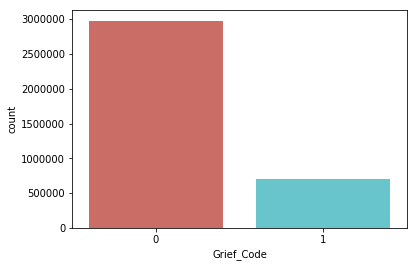

percentage of no grief is 80.78683637583462
percentage of grief is 19.21316362416537


<Figure size 432x288 with 0 Axes>

In [96]:
#Understanding Grief distribution in training dataset
sns.countplot(x='Grief_Code_Y',data=modf_train,palette='hls')
plt.xlabel("Grief_Code")
plt.show()
plt.savefig('count_plot')
count_no_grief = len(modf_train[modf_train['Grief_Code_Y']==0])
count_grief = len(modf_train[modf_train['Grief_Code_Y']==1])
pct_of_no_grief = count_no_grief/(count_no_grief+count_grief)
print("percentage of no grief is", pct_of_no_grief*100)
pct_of_grief = count_grief/(count_no_grief+count_grief)
print("percentage of grief is", pct_of_grief*100)

In [20]:
df=modf_train

In [21]:
modf_validate['Grief_Code_Y'].value_counts()

0    63582
1     1607
Name: Grief_Code_Y, dtype: int64

In [22]:
df['Grief_Code_Y'].value_counts()

0    2976654
1     707924
Name: Grief_Code_Y, dtype: int64

In [23]:
train, test = train_test_split(df, test_size=0.2)

In [24]:
train.shape

(2947662, 101)

In [25]:
train['Grief_Code_Y'].value_counts()

0    2381312
1     566350
Name: Grief_Code_Y, dtype: int64

#### Downsampling of Data

In [26]:
train_majority = train[train.Grief_Code_Y==0]
train_minority = train[train.Grief_Code_Y==1]

In [27]:
train_majority_downsampled = resample(train_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=566350,     # to match minority class
                                 random_state=123)

In [28]:
train_downsampled = pd.concat([train_majority_downsampled, train_minority])

In [29]:
train_downsampled['Grief_Code_Y'].value_counts()

1    566350
0    566350
Name: Grief_Code_Y, dtype: int64

#### Create separate test and train datasets for dependent and independent variables used for training, testing and validating

In [30]:
y_train = train_downsampled.Grief_Code_Y
X_train = train_downsampled.drop('Grief_Code_Y', axis=1)
y_test = test.Grief_Code_Y
X_test = test.drop('Grief_Code_Y', axis=1)
y_validate= modf_validate.Grief_Code_Y
X_validate = modf_validate.drop('Grief_Code_Y', axis=1)

### Model Developement

##### LOGISTIC REGRESSION

In [31]:
glm = LogisticRegression().fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
glm.intercept_

array([5.86723827])

In [52]:
### Prediction for logistic regression
glm_pred = glm.predict(X_test)
print('Accuracy of the logistic regression model is',accuracy_score(y_test, glm_pred) )
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, glm_pred)
print('The confusion Matrix is', confusion_matrix)
print('Specificity of GLM is', confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
print('Sensitivity of GLM is', confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))


Accuracy of the logistic regression model is 0.8175382268806757
The confusion Matrix is [[489518 105824]
 [ 28635 112939]]
Specificity of GLM is 0.5162618907219229
Sensitivity of GLM is 0.9447364002524351


In [61]:
### Calculate AUC Score
from sklearn.metrics import roc_auc_score
prob_glm = glm.predict_proba(X_test)
prob_glm = [p[1] for p in prob_glm]
print( "AUC Score for GLM is ", round(roc_auc_score(y_test, prob_glm),2))



AUC Score for GLM is  0.89


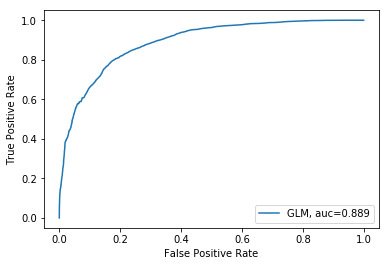

In [124]:
from sklearn import metrics
fpr_glm, tpr_glm, _ = metrics.roc_curve(y_test,  prob_glm)
auc_glm = metrics.roc_auc_score(y_test, prob_glm)
plt.plot(fpr_glm,tpr_glm,label="GLM, auc="+str(round(auc_glm,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [64]:
rf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
rf_pred = rf.predict(X_test)
print( "Accuracy for Random Forest is", round(accuracy_score(y_test, rf_pred),3) )
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_pred)
print('The confusion Matrix is', confusion_matrix)
print('Specificity of GLM is', round(confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]),3))
print('Sensitivity of GLM is', round(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]),3))


Accuracy for Random Forest is 0.867
The confusion Matrix is [[519676  75666]
 [ 22625 118949]]
Specificity of GLM is 0.611
Sensitivity of GLM is 0.958


In [72]:
from sklearn.metrics import roc_auc_score
prob_rf = rf.predict_proba(X_test)
prob_rf = [p[1] for p in prob_rf]
print("The AUC score for Random Forest is", roc_auc_score(y_test, prob_rf) )

0.9244156556254858


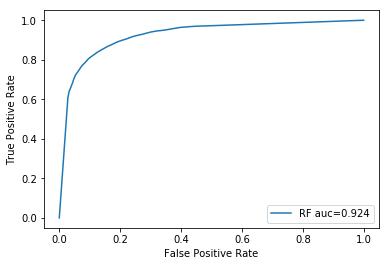

In [116]:
from sklearn import metrics
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  prob_rf)
auc_RF = metrics.roc_auc_score(y_test, prob_rf)
plt.plot(fpr_RF,tpr_RF,label="RF auc="+str(round(auc_RF,3)))
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Feature Importance in Random Forest

Feature ranking:
1. feature 98 (0.232838)
2. feature 99 (0.111118)
3. feature 67 (0.084705)
4. feature 77 (0.053564)
5. feature 92 (0.047473)
6. feature 25 (0.046170)
7. feature 62 (0.033143)
8. feature 34 (0.024662)
9. feature 33 (0.024287)
10. feature 47 (0.022031)
11. feature 8 (0.020321)
12. feature 97 (0.017697)
13. feature 95 (0.016302)
14. feature 30 (0.014899)
15. feature 38 (0.012512)
16. feature 63 (0.011368)
17. feature 2 (0.010873)
18. feature 89 (0.010301)
19. feature 94 (0.010180)
20. feature 28 (0.009616)
21. feature 61 (0.009434)
22. feature 29 (0.008874)
23. feature 13 (0.008239)
24. feature 87 (0.007843)
25. feature 37 (0.007279)
26. feature 91 (0.007064)
27. feature 90 (0.006971)
28. feature 36 (0.006770)
29. feature 0 (0.006668)
30. feature 84 (0.006453)
31. feature 54 (0.006237)
32. feature 53 (0.006111)
33. feature 58 (0.005884)
34. feature 9 (0.005339)
35. feature 10 (0.005290)
36. feature 5 (0.004637)
37. feature 93 (0.004561)
38. feature 96 (0.004343)
39. featu

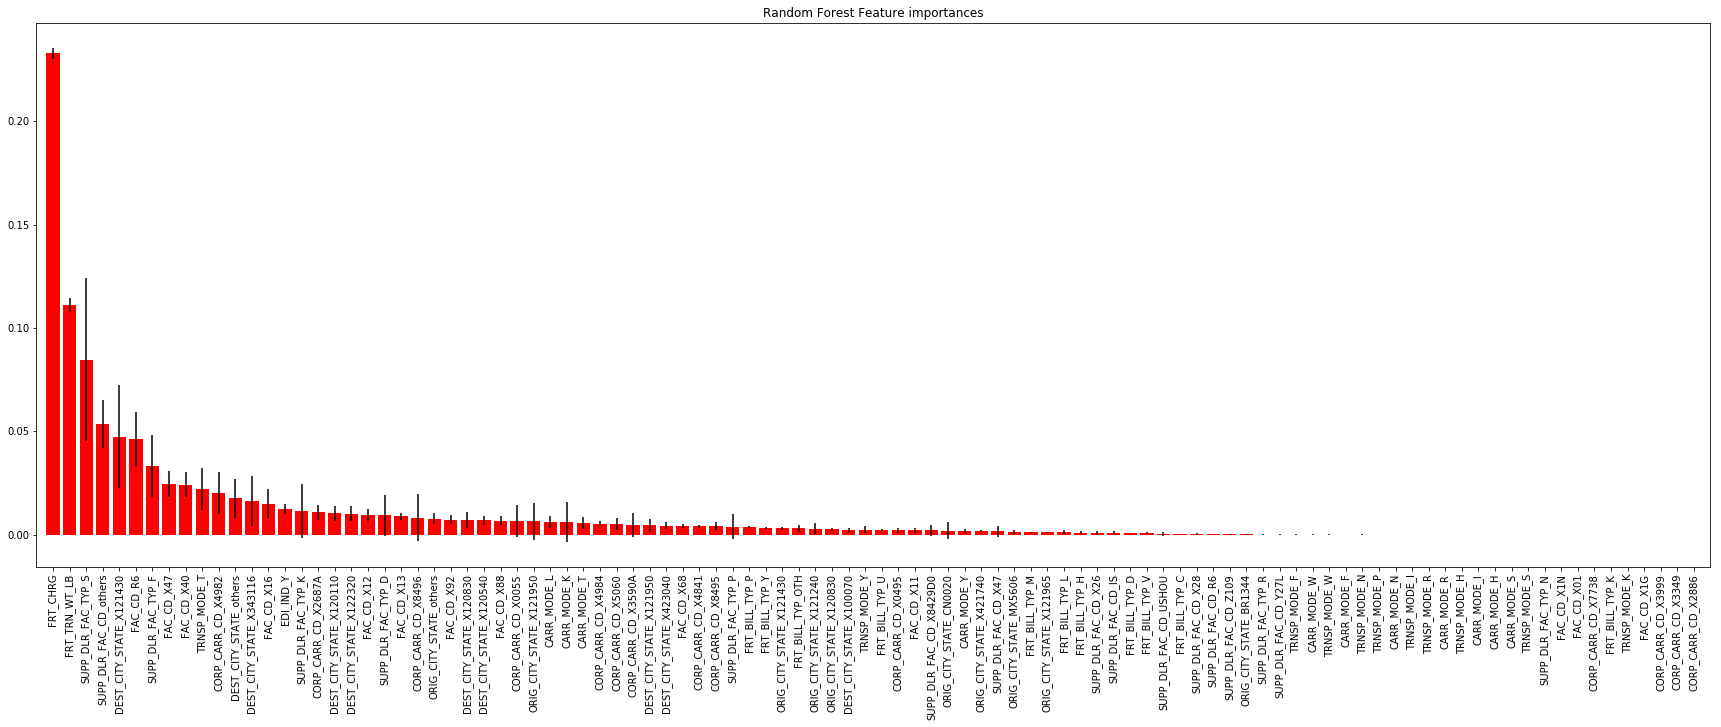

In [157]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(30,10))
plt.title("Random Forest Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices])
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('RF_Feature_Importance.png')
plt.show()


In [159]:
d = {'Feature_name':X_train.columns.values[indices] , 'Feature_importance': importances[indices]}
RF_features = pd.DataFrame(data=d)
RF_features.to_csv("RF_feature_importance.csv", sep=',', encoding='utf-8')

#### XG BOOST

In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [81]:
xgb_pred = xgb.predict(X_test)

In [84]:
xgb_pred = xgb.predict(X_test)
print( "Accuracy for XG Boost is", round(accuracy_score(y_test, xgb_pred),3) )
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, xgb_pred)
print('The confusion Matrix is', confusion_matrix)
print('Specificity of XG Boost is', round(confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]),3))
print('Sensitivity of XG Boost is', round(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]),3))


Accuracy for XG Boost is 0.822
The confusion Matrix is [[493068 102274]
 [ 28750 112824]]
Specificity of XG Boost is 0.525
Sensitivity of XG Boost is 0.945


In [88]:
from sklearn.metrics import roc_auc_score
prob_xgb = xgb.predict_proba(X_test)
prob_xgb = [p[1] for p in prob_xgb]
print("AUC Score for XG Boost is", round(roc_auc_score(y_test, prob_xgb),3) )

AUC Score 0.896


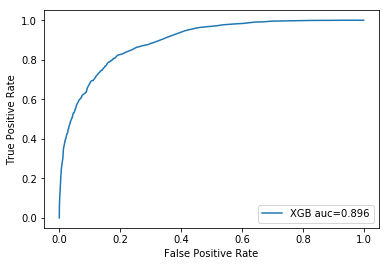

In [117]:
from sklearn import metrics
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  prob_xgb)
auc_xgb = metrics.roc_auc_score(y_test, prob_xgb)
plt.plot(fpr_xgb,tpr_xgb,label="XGB auc="+str(round(auc_xgb,3)))
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Feature Importance for XG Boost

Feature ranking:
1. feature 77 (0.124098)
2. feature 92 (0.063492)
3. feature 47 (0.050505)
4. feature 98 (0.047619)
5. feature 38 (0.047619)
6. feature 33 (0.046176)
7. feature 67 (0.044733)
8. feature 13 (0.040404)
9. feature 62 (0.038961)
10. feature 25 (0.034632)
11. feature 12 (0.034632)
12. feature 34 (0.030303)
13. feature 37 (0.025974)
14. feature 89 (0.024531)
15. feature 82 (0.023088)
16. feature 28 (0.023088)
17. feature 29 (0.018759)
18. feature 9 (0.017316)
19. feature 8 (0.017316)
20. feature 2 (0.017316)
21. feature 30 (0.015873)
22. feature 63 (0.014430)
23. feature 97 (0.014430)
24. feature 87 (0.012987)
25. feature 36 (0.012987)
26. feature 95 (0.012987)
27. feature 49 (0.011544)
28. feature 54 (0.010101)
29. feature 20 (0.010101)
30. feature 35 (0.008658)
31. feature 58 (0.008658)
32. feature 68 (0.008658)
33. feature 94 (0.008658)
34. feature 80 (0.007215)
35. feature 24 (0.007215)
36. feature 96 (0.007215)
37. feature 22 (0.005772)
38. feature 10 (0.005772)
39. fea

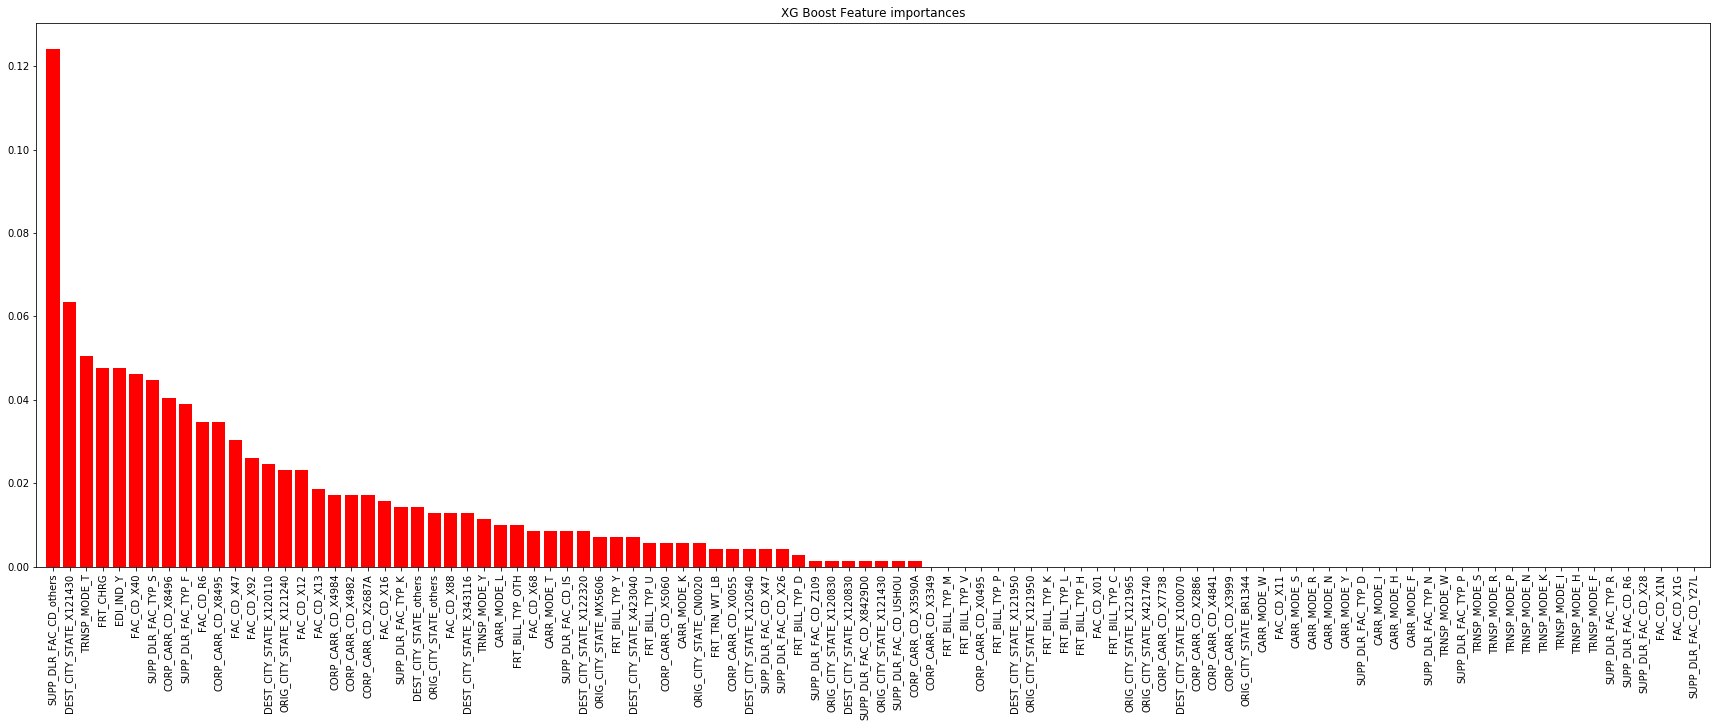

In [172]:
xgb_importances = xgb.feature_importances_
indices_xgb = np.argsort(xgb_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_xgb[f], xgb_importances[indices_xgb[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(30,10))
plt.title("XG Boost Feature importances")
plt.bar(range(X_train.shape[1]), xgb_importances[indices_xgb],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices_xgb])
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('XG_Boost_Feature_Importance.png')
plt.show()

In [174]:
d_xgb = {'Feature_name':X_train.columns.values[indices_xgb] , 'Feature_importance': xgb_importances[indices_xgb]}
xgb_features = pd.DataFrame(data=d_xgb)
xgb_features.to_csv("xgb_feature_importance.csv", sep=',', encoding='utf-8')

#### Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [93]:
dt_pred = dt.predict(X_test)
print( "Accuracy for DT is", round(accuracy_score(y_test, dt_pred),3) )
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, dt_pred)
print('The confusion Matrix is', confusion_matrix)
print('Specificity of DT is', round(confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]),3))
print('Sensitivity of DT is', round(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]),3))


Accuracy for DT is 0.86
The confusion Matrix is [[516187  79155]
 [ 23946 117628]]
Specificity of DT is 0.598
Sensitivity of DT is 0.956


In [95]:
from sklearn.metrics import roc_auc_score
prob_dt = dt.predict_proba(X_test)
prob_dt = [p[1] for p in prob_dt]
print("AUC Score for Decision Tree", round(roc_auc_score(y_test, prob_dt),3) )

AUC Score 0.872


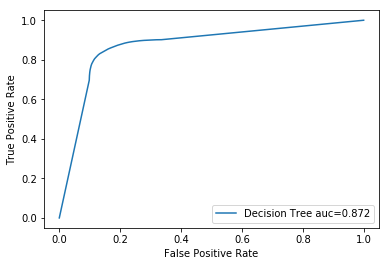

In [118]:
from sklearn import metrics
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test,  prob_dt)
auc_dt = metrics.roc_auc_score(y_test, prob_dt)
plt.plot(fpr_dt,tpr_dt,label="Decision Tree auc="+str(round(auc_dt,3)))
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Feature Importance in Decision Tree

Feature ranking:
1. feature 98 (0.197585)
2. feature 67 (0.139461)
3. feature 99 (0.105678)
4. feature 25 (0.064693)
5. feature 13 (0.062613)
6. feature 77 (0.052159)
7. feature 92 (0.034971)
8. feature 47 (0.030893)
9. feature 8 (0.024555)
10. feature 34 (0.023963)
11. feature 33 (0.022742)
12. feature 30 (0.022201)
13. feature 89 (0.016608)
14. feature 62 (0.015010)
15. feature 2 (0.011712)
16. feature 38 (0.011676)
17. feature 97 (0.010013)
18. feature 36 (0.008566)
19. feature 87 (0.008250)
20. feature 29 (0.008239)
21. feature 54 (0.007859)
22. feature 28 (0.007765)
23. feature 91 (0.007212)
24. feature 37 (0.006831)
25. feature 49 (0.006115)
26. feature 9 (0.005813)
27. feature 90 (0.005377)
28. feature 35 (0.005088)
29. feature 21 (0.004439)
30. feature 95 (0.004131)
31. feature 7 (0.003951)
32. feature 24 (0.003917)
33. feature 53 (0.003681)
34. feature 86 (0.003624)
35. feature 81 (0.003218)
36. feature 93 (0.003049)
37. feature 84 (0.003003)
38. feature 20 (0.002987)
39. feat

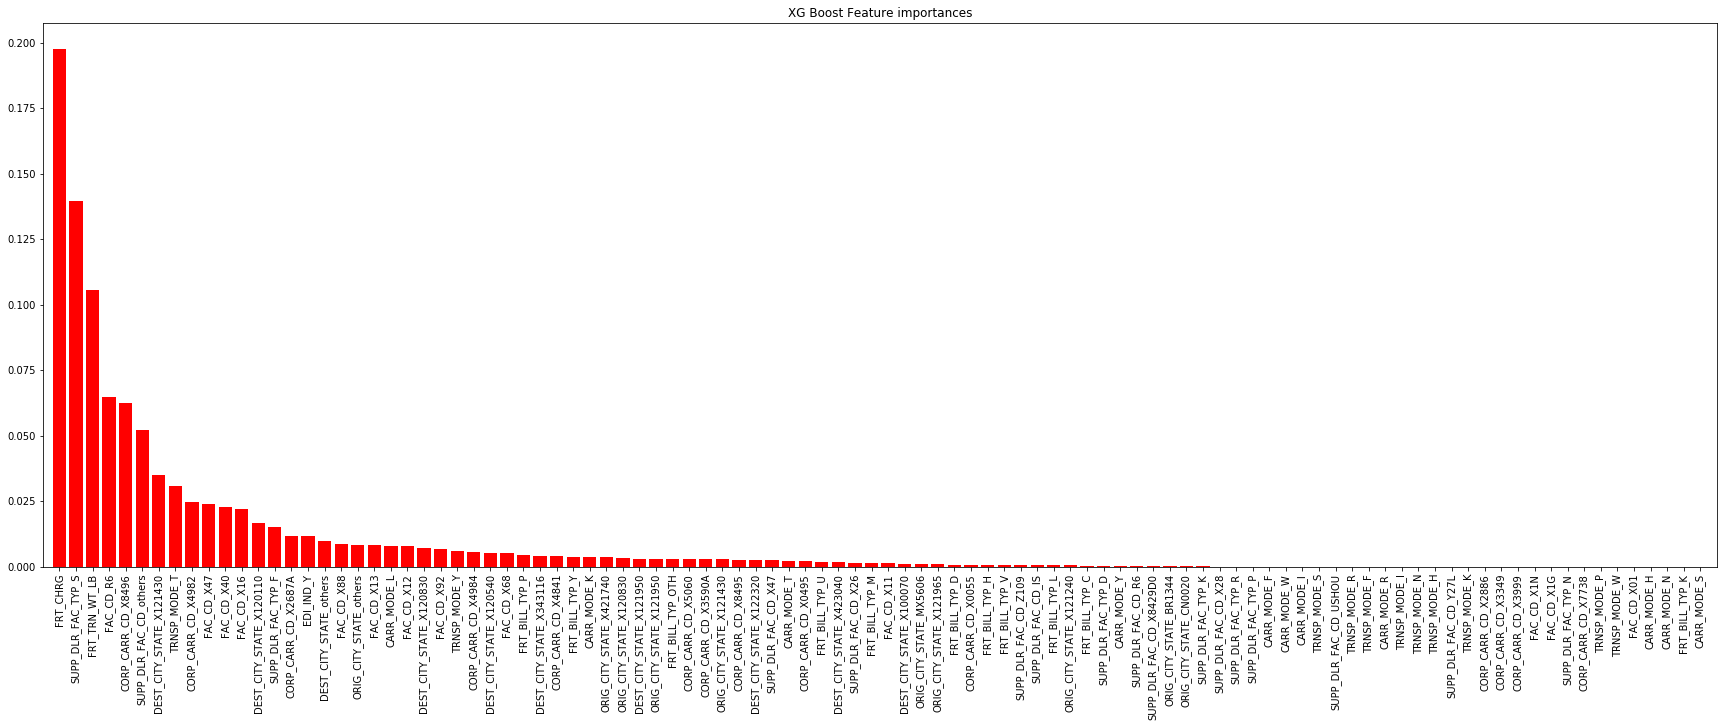

In [175]:
dt_importances = dt.feature_importances_
indices_dt = np.argsort(dt_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_dt[f], dt_importances[indices_dt[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(30,10))
plt.title("XG Boost Feature importances")
plt.bar(range(X_train.shape[1]), dt_importances[indices_dt],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices_dt])
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('DT_Feature_Importance.png')
plt.show()

In [176]:
d_dt = {'Feature_name':X_train.columns.values[indices_dt] , 'Feature_importance': dt_importances[indices_dt]}
dt_features = pd.DataFrame(data=d_dt)
dt_features.to_csv("dt_feature_importance.csv", sep=',', encoding='utf-8')

### AUC Score Comparison between Logistic regression, random forest, XG Boost and decision tree

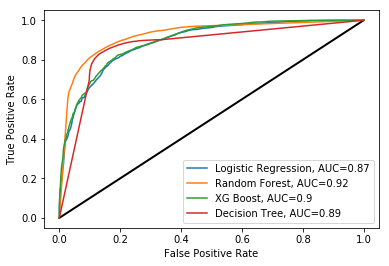

In [126]:
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2)
plt.plot(fpr_glm,tpr_glm,label="Logistic Regression, AUC="+str(round(auc_dt,2)))
plt.plot(fpr_RF,tpr_RF,label="Random Forest, AUC="+str(round(auc_RF,2)))
plt.plot(fpr_xgb,tpr_xgb,label="XG Boost, AUC="+str(round(auc_xgb,2)))
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, AUC="+str(round(auc_glm,2)))

plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Performance evaluation on Validation Data

In [165]:
### Prediction for logistic regression
glm_validate = glm.predict(X_validate)
print('Accuracy of the logistic regression model is',accuracy_score(y_validate, glm_validate) )
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, glm_validate)
print('The confusion Matrix is', confusion_matrix)
print('Specificity of GLM is', confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
print('Sensitivity of GLM is', confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
from sklearn.metrics import roc_auc_score
prob_glm_validate = glm.predict_proba(X_validate)
prob_glm_validate = [p[1] for p in prob_glm_validate]
print( "AUC Score for GLM is ", round(roc_auc_score(y_validate, prob_glm_validate),2))


Accuracy of the logistic regression model is 0.9111353142401325
The confusion Matrix is [[58034  5548]
 [  245  1362]]
Specificity of GLM is 0.1971056439942113
Sensitivity of GLM is 0.9957960843528544
AUC Score for GLM is  0.95


In [166]:
rf_validate = rf.predict(X_validate)
print( "Accuracy for Random Forest is", round(accuracy_score(y_validate, rf_validate),3) )
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rf_validate)
print('The confusion Matrix is', confusion_matrix)
print('Specificity of RF is', round(confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]),3))
print('Sensitivity of RF is', round(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]),3))
from sklearn.metrics import roc_auc_score
prob_rf_validate = rf.predict_proba(X_validate)
prob_rf_validate = [p[1] for p in prob_rf_validate]
print( roc_auc_score(y_validate, prob_rf_validate) )


Accuracy for Random Forest is 0.848
The confusion Matrix is [[53942  9640]
 [  262  1345]]
Specificity of RF is 0.122
Sensitivity of RF is 0.995
0.9103414506972527


In [169]:
xgb_validate = xgb.predict(X_validate)
print( "Accuracy for XG Boost is", round(accuracy_score(y_validate, xgb_validate),3) )
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, xgb_validate)
print('The confusion Matrix is', confusion_matrix)
print('Specificity of XG Boost is', round(confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]),3))
print('Sensitivity of XG Boost is', round(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]),3))
from sklearn.metrics import roc_auc_score
prob_xgb_validate = xgb.predict_proba(X_validate)
prob_xgb_validate = [p[1] for p in prob_xgb_validate]
print("AUC Score", round(roc_auc_score(y_validate, prob_xgb_validate),3) )

Accuracy for XG Boost is 0.937
The confusion Matrix is [[59796  3786]
 [  326  1281]]
Specificity of XG Boost is 0.253
Sensitivity of XG Boost is 0.995
AUC Score 0.946


In [170]:
dt_validate = dt.predict(X_validate)
print( "Accuracy for DT is", round(accuracy_score(y_validate, dt_validate),3) )
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, dt_validate)
print('The confusion Matrix is', confusion_matrix)
print('Specificity of DT is', round(confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]),3))
print('Sensitivity of DT is', round(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]),3))
from sklearn.metrics import roc_auc_score
prob_dt_validate = dt.predict_proba(X_validate)
prob_dt_validate = [p[1] for p in prob_dt_validate]
print("AUC Score", round(roc_auc_score(y_validate, prob_dt_validate),3) )

Accuracy for DT is 0.771
The confusion Matrix is [[48945 14637]
 [  300  1307]]
Specificity of DT is 0.082
Sensitivity of DT is 0.994
AUC Score 0.793
